Seeting the kaggle directory

In [63]:
cd C:\2017\Work\Python\Kaggle

C:\2017\Work\Python\Kaggle


In [1]:
pwd

'C:\\Users\\anike'

Reading the dataset and cleanin the dataset columns

In [64]:
import pandas as pd
train_tran_mem_user = pd.read_csv("train_tran_mem_user.csv")
test_tran_mem_user = pd.read_csv("test_tran_mem_user.csv")


train_tran1 = train_tran_mem_user.drop_duplicates(keep="first", subset = ["msno"])# dropped duplicated column from transaction
test_tran1 = test_tran_mem_user.drop_duplicates(keep="first", subset = ["msno"])
train_tran1.reset_index(inplace=False)
test_tran1.reset_index(inplace=False)

train_tran1['gender'] = train_tran1['gender'].map({'female': 2, 'male': 1})
test_tran1['gender'] = test_tran1['gender'].map({'female': 2, 'male': 1})

train_tran1 = train_tran1.fillna(0)
test_tran1 = test_tran1.fillna(0)

train_tran1.loc[train_tran1['bd'] < 0, 'bd'] = 0
train_tran1.loc[train_tran1['bd'] > 80, 'bd'] = 0

test_tran1.loc[test_tran1['bd'] < 0, 'bd'] = 0
test_tran1.loc[test_tran1['bd'] > 80, 'bd'] = 0


train_tran1["discount"]= [int(i) for i in (train_tran1["plan_list_price"] - train_tran1["actual_amount_paid"])]
train_tran1.loc[train_tran1['discount'] < 0, 'discount'] = 0
test_tran1["discount"]= [int(i) for i in (test_tran1["plan_list_price"] - test_tran1["actual_amount_paid"])]
test_tran1.loc[test_tran1['discount'] < 0, 'discount'] = 0

In [3]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import model_selection, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search


C:\Users\anike\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\anike\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Creating dummy variables for city and registered_via

In [65]:
dummy_city = pd.get_dummies(train_tran1["city"], prefix="city")
train_tran1 = pd.concat([train_tran1, dummy_city], axis=1)

dummy_city1 = pd.get_dummies(test_tran1["city"], prefix="city")
test_tran1 = pd.concat([test_tran1, dummy_city1], axis=1)

dummy_regvia = pd.get_dummies(train_tran1["registered_via"], prefix="regv")
train_tran1 = pd.concat([train_tran1, dummy_regvia], axis=1)

dummy_regvia1 = pd.get_dummies(test_tran1["registered_via"], prefix="regv")
test_tran1 = pd.concat([test_tran1, dummy_regvia1], axis=1)

Creating new variables

In [4]:
train_tran1['is_discount'] = train_tran1.discount.apply(lambda x: 1 if x > 0 else 0)

In [5]:
test_tran1['is_discount'] = test_tran1.discount.apply(lambda x: 1 if x > 0 else 0)

In [8]:
test_tran1['autorenew_&_not_cancel'] = ((test_tran1.is_auto_renew == 1) == (test_tran1.is_cancel == 0)).astype(np.int8)
train_tran1['autorenew_&_not_cancel'] = ((train_tran1.is_auto_renew == 1) == (train_tran1.is_cancel == 0)).astype(np.int8)

In [9]:
train_tran1['notAutorenew_&_cancel'] = ((train_tran1.is_auto_renew == 0) == (train_tran1.is_cancel == 1)).astype(np.int8)
test_tran1['notAutorenew_&_cancel'] = ((test_tran1.is_auto_renew == 0) == (test_tran1.is_cancel == 1)).astype(np.int8)

In [67]:
Membership = []

for i in train_tran1["Membership_se_days"]:
    if i <365:
        i=1
    else:
        i=0
    Membership.append(i)
    
train_tran1["Member"] = Membership

In [68]:
Membership = []

for i in test_tran1["Membership_se_days"]:
    if i > 365:
        i=1
    else:
        i=0
    Membership.append(i)
    
test_tran1["Member"] = Membership

Feature variables of the dataset

In [124]:
predictors = ['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'bd','gender','registration_init_time','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_auto_renew','is_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0', 'lin_reg_predict2']


In [ ]:
predictors = ['payment_method_id', 'payment_plan_days', 'plan_list_price', 'actual_amount_paid', 'bd','gender','registration_init_time','date_count', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100', 'num_unq', 'total_secs',
 'discount', 'is_discount','is_auto_renew','is_cancel','city_0.0', 'city_1.0', 'city_3.0', 'city_4.0', 'city_5.0', 'city_6.0', 'city_7.0', 'city_8.0', 'city_9.0', 'city_10.0',
 'city_11.0', 'city_12.0', 'city_13.0', 'city_14.0', 'city_15.0', 'city_16.0', 'city_17.0', 'city_18.0', 'city_19.0', 'city_20.0',
 'city_21.0', 'city_22.0', 'regv_0.0', 'regv_3.0', 'regv_4.0', 'regv_7.0', 'regv_9.0', 'regv_13.0']

In [ ]:
test_tran1.info()

In [ ]:
train_tran1.info()

In [42]:
predictors.remove("registered_via")

In [114]:
import sklearn.utils
train_random = sklearn.utils.shuffle(train_tran1)
#print('\n\ntrain_random: {0}'.format(train_random))
train_data = train_random.reset_index(drop=True)

In [15]:
train = train_data[0:50000]

In [ ]:
param_test1 = {'n_estimators':list(range(90,150,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train["is_churn"])

In [ ]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_


In [ ]:
param_test2 = {'max_depth':list(range(5,16,2)), 'min_samples_split':list(range(200,1001,200))}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train["is_churn"])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [115]:
train = train_data[1:600000]
test = train_data[600001:]

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_tran1[predictors], train_tran1['is_churn'])
from sklearn.metrics import mean_squared_error
train_predictions1 = lr.predict(train_tran1[predictors])
train_predictions1 = train_predictions1.clip(0.0000001, 0.999999)
test_predictions1 = lr.predict(test_tran1[predictors])
test_predictions1 = test_predictions1.clip(0.0000001, 0.999999)

In [70]:
train_tran1['lin_reg_predict'] = train_predictions1
test_tran1['lin_reg_predict'] = test_predictions1

In [69]:
len(train_predictions1)

970960

In [127]:
cols = predictors

train = train_data
test = test_tran1



import sys
import gc; gc.enable()
import collections
import xgboost as xgb
import pandas as pd
import numpy as np
import sklearn

In [119]:
def xgb_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'log_loss', sklearn.metrics.log_loss(labels, preds)

fold = 1
for i in range(fold):
    params = {
        'eta': 0.002, #use 0.002
        'max_depth': 5,
        'subsample': 0.5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = sklearn.model_selection.train_test_split(train[cols], train['is_churn'], test_size=0.3, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 2000,  watchlist, feval=xgb_score, maximize=False, verbose_eval=50, early_stopping_rounds=50) #use 1500
    if i != 0:
        pred += model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
    else:
        pred = model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
pred /= fold
test_predictions = pred.clip(0.0000001, 0.999999)


[0]	train-logloss:0.69143	valid-logloss:0.691433	train-log_loss:0.69143	valid-log_loss:0.691433
Multiple eval metrics have been passed: 'valid-log_loss' will be used for early stopping.

Will train until valid-log_loss hasn't improved in 50 rounds.
[50]	train-logloss:0.613548	valid-logloss:0.61369	train-log_loss:0.613548	valid-log_loss:0.61369
[100]	train-logloss:0.548785	valid-logloss:0.549054	train-log_loss:0.548785	valid-log_loss:0.549054
[150]	train-logloss:0.494282	valid-logloss:0.494666	train-log_loss:0.494282	valid-log_loss:0.494666
[200]	train-logloss:0.44795	valid-logloss:0.448443	train-log_loss:0.44795	valid-log_loss:0.448443
[250]	train-logloss:0.408254	valid-logloss:0.408854	train-log_loss:0.408254	valid-log_loss:0.408854
[300]	train-logloss:0.374039	valid-logloss:0.37474	train-log_loss:0.374039	valid-log_loss:0.37474
[350]	train-logloss:0.344396	valid-logloss:0.345195	train-log_loss:0.344396	valid-log_loss:0.345195
[400]	train-logloss:0.318603	valid-logloss:0.319492	train-

In [129]:
min(test_predictions)

0.0094632711

In [130]:
max(test_predictions)

0.97430509

In [123]:
from sklearn.metrics import mean_squared_error
test_mse = mean_squared_error(test_predictions, test['is_churn'])
import numpy as np
#train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
#print(train_rmse)
print(test_rmse)

0.185000475216


Submission 61 used linear regression model with predictions as feature
Submission 62 used linear regression model with predictions greater than 0.2 as 1 else 0 as feature in training

In [131]:
submission = pd.DataFrame({
    "is_churn": test_predictions,
        "msno": test_tran1["msno"]        
    })

submission.to_csv("sample_submission_new62.csv", index=False)

In [128]:
def xgb_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'log_loss', sklearn.metrics.log_loss(labels, preds)

fold = 1
for i in range(fold):
    params = {
        'eta': 0.002, #use 0.002
        'max_depth': 5,
        'subsample': 0.5,
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'seed': i,
        'silent': True
    }
    x1, x2, y1, y2 = sklearn.model_selection.train_test_split(train[cols], train['is_churn'], test_size=0.3, random_state=i)
    watchlist = [(xgb.DMatrix(x1, y1), 'train'), (xgb.DMatrix(x2, y2), 'valid')]
    model = xgb.train(params, xgb.DMatrix(x1, y1), 2000,  watchlist, feval=xgb_score, maximize=False, verbose_eval=50, early_stopping_rounds=50) #use 1500
    if i != 0:
        pred += model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
    else:
        pred = model.predict(xgb.DMatrix(test[cols]), ntree_limit=model.best_ntree_limit)
pred /= fold
test_predictions = pred.clip(0.0000001, 0.999999)

[0]	train-logloss:0.691431	valid-logloss:0.69143	train-log_loss:0.691431	valid-log_loss:0.69143
Multiple eval metrics have been passed: 'valid-log_loss' will be used for early stopping.

Will train until valid-log_loss hasn't improved in 50 rounds.
[50]	train-logloss:0.613578	valid-logloss:0.61353	train-log_loss:0.613578	valid-log_loss:0.61353
[100]	train-logloss:0.548853	valid-logloss:0.54876	train-log_loss:0.548853	valid-log_loss:0.54876
[150]	train-logloss:0.494363	valid-logloss:0.494231	train-log_loss:0.494363	valid-log_loss:0.494231
[200]	train-logloss:0.448057	valid-logloss:0.447887	train-log_loss:0.448057	valid-log_loss:0.447887
[250]	train-logloss:0.408393	valid-logloss:0.408188	train-log_loss:0.408393	valid-log_loss:0.408188
[300]	train-logloss:0.374189	valid-logloss:0.373954	train-log_loss:0.374189	valid-log_loss:0.373954
[350]	train-logloss:0.344551	valid-logloss:0.344287	train-log_loss:0.344551	valid-log_loss:0.344287
[400]	train-logloss:0.318786	valid-logloss:0.318495	trai

Creating new feature from lin_reg_predict for values greater than 0.2 as 1 and rest 0

In [104]:
pred_train = []

for i in train_tran1["lin_reg_predict"]:
    if i > 0.2:
        i=1
    else:
        i=0
    pred_train.append(i)
    
train_tran1["lin_reg_predict2"] = pred_train
pred_test = []

for i in test_tran1["lin_reg_predict"]:
    if i > 0.2:
        i=1
    else:
        i=0
    pred_test.append(i)
    
test_tran1["lin_reg_predict2"] = pred_test

In [22]:
test_pred = []
test_pred = test_predictions1

In [ ]:
train_tran1[predictors].info()

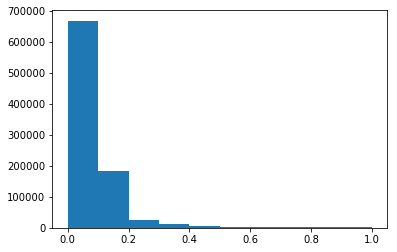

In [107]:
import matplotlib.pyplot as plt
plt.hist(test_tran1["lin_reg_predict"])
plt.show()

In [35]:
test_pred = test_pred.clip(0.0000001, 0.999999)

In [108]:
train_tran1["is_churn"].value_counts()

0    883630
1     87330
Name: is_churn, dtype: int64

In [111]:
d_churn = train_tran1.pivot_table(index = "is_churn", values="lin_reg_predict2")
d_churn

,lin_reg_predict2
is_churn,
0,0.055390
1,0.633081
